   ## Line Detection - Using Hough Lines
   
**cv2.HoughLines**(binarized/thresholded image, 𝜌 accuracy, 𝜃 accuracy, threshold)
- Threshold here is the minimum vote for it to be considered a line


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


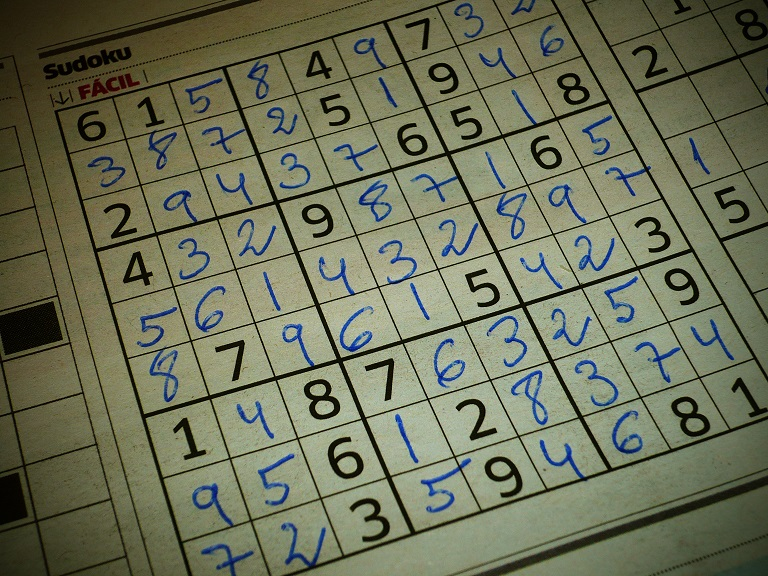

-1

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
image=cv2.imread('/content/drive/MyDrive/Hands-On-Computer-Vision-with-OpenCV-4-Keras-and-TensorFlow-2-master/Section 3/images/soduku.jpg')
cv2_imshow(image)
cv2.waitKey()

In [ ]:
# # Grayscale and Canny Edges extracted
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edges=cv2.Canny(gray,100,170,apertureSize=3)

lines=cv2.HoughLines(edges,1,np.pi/180,240)
# cv2_imshow(lines)

for line in lines:
  rho,theta=line[0]
  a=np.cos(theta)
  b=np.sin(theta)
  x0=a*rho
  y0=b*rho
  x1=int(x0+1000*(-b))
  y1=int(y0+1000*(a))
  x2=int(x0-1000*(-b))
  y2=int(y0-1000*(a))
  cv2.line(image,(x1,y1),(x2,y2),(255,0,0),2)
cv2_imshow(image)

In [ ]:
# import cv2
# import numpy as np

# image = cv2.imread('images/soduku.jpg')
# cv2.imshow('Original', image)
# cv2.waitKey(0)
# # Grayscale and Canny Edges extracted
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# edges = cv2.Canny(gray, 100, 170, apertureSize = 3)

# Run HoughLines using a rho accuracy of 1 pixel
# theta accuracy of np.pi / 180 which is 1 degree
# Our line threshold is set to 240 (number of points on line)
# lines = cv2.HoughLines(edges, 1, np.pi / 180, 240)

# We iterate through each line and convert it to the format
# required by cv2.lines (i.e. requiring end points)


# for line in lines:
#     rho, theta = line[0]
#     a = np.cos(theta)
#     b = np.sin(theta)
#     x0 = a * rho
#     y0 = b * rho
#     x1 = int(x0 + 1000 * (-b))
#     y1 = int(y0 + 1000 * (a))
#     x2 = int(x0 - 1000 * (-b))
#     y2 = int(y0 - 1000 * (a))
#     cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

# cv2.imshow('Hough Lines', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

### Probabilistic Hough Lines

**cv2.HoughLinesP(binarized image, 𝜌 accuracy, 𝜃 accuracy, threshold, minimum line length, max line gap)




(169, 1, 4)


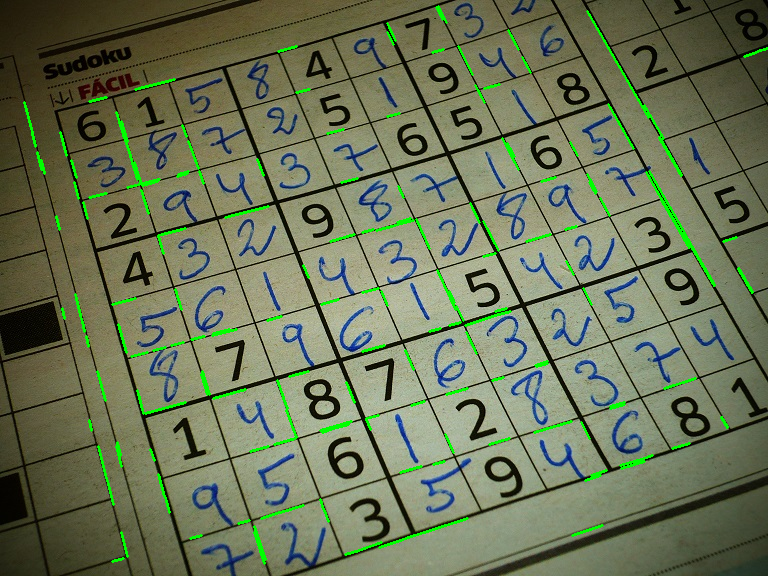

In [9]:
import cv2
import numpy as np

# Grayscale and Canny Edges extracted
image = cv2.imread('/content/drive/MyDrive/Hands-On-Computer-Vision-with-OpenCV-4-Keras-and-TensorFlow-2-master/Section 3/images/soduku.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)

# Again we use the same rho and theta accuracies
# However, we specific a minimum vote (pts along line) of 100
# and Min line length of 5 pixels and max gap between lines of 10 pixels
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 200, 5, 10)
print(lines.shape)

for x in range(0, len(lines)):
    for x1,y1,x2,y2 in lines[x]:
        cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)

cv2_imshow(image)
cv2.waitKey()
cv2.destroyAllWindows()

# Circle Detection - Hough Cirlces

**cv2.HoughCircles**(image, method, dp, MinDist, param1, param2, minRadius, MaxRadius)


- Method - currently only cv2.HOUGH_GRADIENT available
- dp - Inverse ratio of accumulator resolution
- MinDist - the minimum distance between the center of detected circles
- param1 - Gradient value used in the edge detection
- param2 - Accumulator threshold for the HOUGH_GRADIENT method (lower allows more circles to be detected (false positives))
- minRadius - limits the smallest circle to this size (via radius)
- MaxRadius - similarly sets the limit for the largest circles



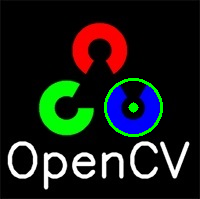

In [10]:
import cv2
import numpy as np

image = cv2.imread('/content/drive/MyDrive/Hands-On-Computer-Vision-with-OpenCV-4-Keras-and-TensorFlow-2-master/Section 3/images/opencv.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.medianBlur(gray, 5)

circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1.5, 20)

circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(image,(i[0], i[1]), i[2], (0, 255, 0), 2)
    
    # draw the center of the circle
    cv2.circle(image, (i[0], i[1]), 2, (0, 255, 0), 5)

cv2_imshow(image)
cv2.waitKey()
cv2.destroyAllWindows()

## Blob Detection

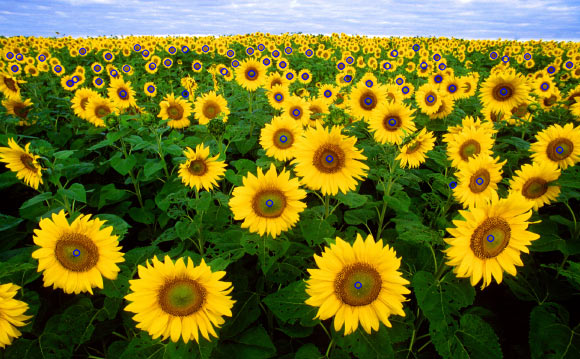

In [15]:
# Standard imports
import cv2
import numpy as np;
 
# Read image
image = cv2.imread("/content/drive/MyDrive/Hands-On-Computer-Vision-with-OpenCV-4-Keras-and-TensorFlow-2-master/Section 3/images/Sunflowers.jpg")
 
# Set up the detector with default parameters.
detector =cv2.SimpleBlobDetector_create()
 
# Detect blobs.
keypoints = detector.detect(image)
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of
# the circle corresponds to the size of blob
blank = np.zeros((1,1)) 
blobs = cv2.drawKeypoints(image, keypoints, blank, (255,0,0),
                                      cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
 
# Show keypoints
cv2_imshow(blobs)
cv2.waitKey()
cv2.destroyAllWindows()

The function **cv2.drawKeypoints** takes the following arguments:

**cv2.drawKeypoints**(input image, keypoints, blank_output_array, color, flags)

flags:
- cv2.DRAW_MATCHES_FLAGS_DEFAULT
- cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
- cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG
- cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS